In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Label mappings for plotting
MODEL_LABELS = {
    "gpt-5": "G5",
    "gpt-4o": "G4o",
    "gpt-4o-mini": "G4o-m",
    "phi4": "Phi4",
    "qwen32": "Qw32B",
    "qwen14": "Qw14B",
    "codestral": "Co22B",
    "gemma3": "Ge3",
}

PROCESSOR_LABELS = { "dp": "DP",
                    "mc": "MC",  
                    "sg": "ArdSG",
                    "psg": "PySG-CPU", 
                    "tpusg": "PySG-TPU",}
PROMPT_TYPE_LABELS = {
    'abla-l1': 'Prompt L1',
    'abla-l2': 'Prompt L2',
    'original': 'Prompt Original'
}
MODEL_ORDER_PREF = list(MODEL_LABELS.keys())
PROCESSOR_ORDER_PREF = list(PROCESSOR_LABELS.keys())
TYPE_ORDER_PREF = list(PROMPT_TYPE_LABELS.keys())

In [13]:
# Load the data
df = pd.read_csv('all-abla.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (721, 15)

Column names:
['name', 'trace_id', 'batch_id', 'status', 'latency', 'total_tokens', 'prompt_tokens', 'completion_tokens', 'total_cost', 'prompt_cost', 'completion_cost', 'parameters', 'processor', 'model', 'prompt_type']

First few rows:


,name,trace_id,batch_id,status,latency,total_tokens,prompt_tokens,completion_tokens,total_cost,prompt_cost,completion_cost,parameters,processor,model,prompt_type
0,7abe_sketch_generator,7abe4ab8,gpt-5-2025-08-07_88d1_sg_batch,failure,400.57,26342,5549,20793,0.210258,0.0,0.0,F,sg,gpt-5,abla-l1
1,6ff7_sketch_generator,6ff7c149,gpt-5-2025-08-07_88d1_sg_batch,failure,410.43,27201,4029,23172,0.236756,0.0,0.0,F,sg,gpt-5,abla-l1
2,3497_sketch_generator,3497b2c8,gpt-5-2025-08-07_88d1_sg_batch,failure,389.98,29833,8654,21179,0.216992,0.0,0.0,F,sg,gpt-5,abla-l1
3,8b3a_sketch_generator,8b3acbc1,gpt-5-2025-08-07_88d1_sg_batch,failure,473.14,33957,9423,24534,0.251071,0.0,0.0,F,sg,gpt-5,abla-l1
4,76bf_sketch_generator,76bf72db,gpt-5-2025-08-07_88d1_sg_batch,success,380.98,24082,3237,20845,0.212496,0.0,0.0,F,sg,gpt-5,abla-l1


In [14]:
# Check unique values for categorization factors
print("Unique processors:", sorted(df['processor'].unique()))
print("Unique models:", sorted(df['model'].unique()))
print("Unique prompt_types:", sorted(df['prompt_type'].unique()))
print("\nUnique status values:", sorted(df['status'].unique()))
print("\nData distribution:")
df.groupby(['model', 'prompt_type', 'processor']).size()

Unique processors: ['psg', 'sg', 'tpusg']
Unique models: ['gpt-5', 'phi4', 'qwen32']
Unique prompt_types: ['abla-l1', 'abla-l2', 'original']

Unique status values: ['failure', 'success']

Data distribution:


model   prompt_type  processor
gpt-5   abla-l1      psg          30
                     sg           30
                     tpusg        30
        abla-l2      psg          30
                     sg           30
                     tpusg        30
        original     psg          30
                     sg           30
                     tpusg        30
phi4    abla-l1      psg          30
                     sg           30
                     tpusg        30
        abla-l2      psg          30
                     sg           11
                     tpusg        30
        original     psg          30
                     tpusg        30
qwen32  abla-l1      psg          30
                     sg           30
                     tpusg        30
        abla-l2      psg          30
                     sg           20
                     tpusg        30
        original     psg          30
                     tpusg        30
dtype: int64

In [15]:
# Calculate success rates for each processor-prompt_type-model combination
def calculate_success_rate(group):
    total = len(group)
    success_count = (group['status'] == 'success').sum()
    return (success_count / total) * 100 if total > 0 else 0

# Group by model, prompt_type, and processor, then calculate success rate
success_rates = df.groupby(['model', 'prompt_type', 'processor']).apply(calculate_success_rate).reset_index()
success_rates.columns = ['model', 'prompt_type', 'processor', 'success_rate']

# print("Success rates by combination:")
# print(success_rates.sort_values(['prompt_type', 'model', 'processor']))
success_rates

/tmp/ipykernel_2863060/2213007451.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_rates = df.groupby(['model', 'prompt_type', 'processor']).apply(calculate_success_rate).reset_index()


,model,prompt_type,processor,success_rate
0,gpt-5,abla-l1,psg,100.000000
1,gpt-5,abla-l1,sg,10.000000
2,gpt-5,abla-l1,tpusg,100.000000
3,gpt-5,abla-l2,psg,100.000000
4,gpt-5,abla-l2,sg,70.000000
5,gpt-5,abla-l2,tpusg,100.000000
6,gpt-5,original,psg,96.666667
7,gpt-5,original,sg,100.000000
8,gpt-5,original,tpusg,90.000000
9,phi4,abla-l1,psg,50.000000


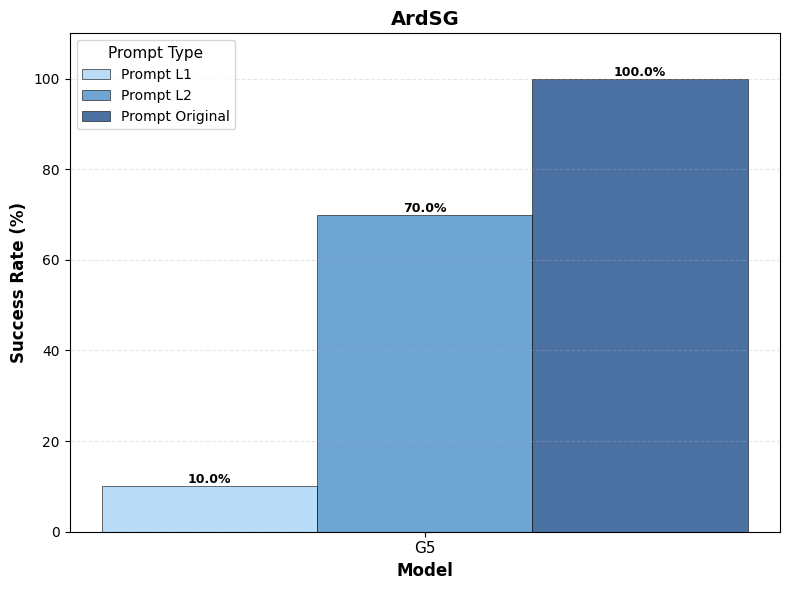

SG plot saved as 'figs/success-rate_sg.pdf'


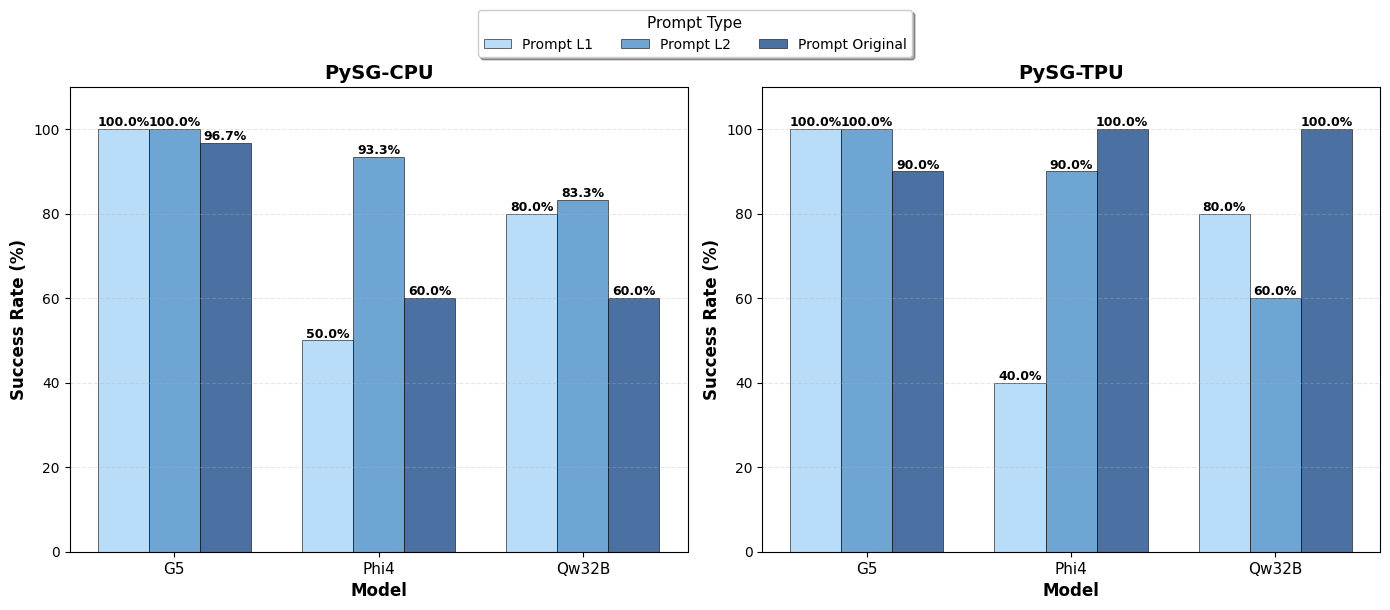

PSG and TPUSG plot saved as 'figs/success-rate_psg_tpusg.pdf'


In [16]:
# Define the order of elements
prompt_types = ['abla-l1', 'abla-l2', 'original']
models = ['gpt-5', 'phi4', 'qwen32']

# Define colors for each prompt_type (gradient blue: light -> medium -> dark)
colors = {
    'abla-l1': '#a8d5f7',      # light blue (shallow)
    'abla-l2': '#4a8fc9',      # medium blue
    'original': '#1e4d8b'      # dark blue (deep)
}

# Bar width and positions
bar_width = 0.25

# ============= PLOT 1: SG Processor (GPT-5 Only) =============
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 6))

processor = 'sg'
sg_model = 'gpt-5'  # Only show GPT-5 for SG
ax = ax1

# Filter data for SG processor and GPT-5 model
data_subset = success_rates[(success_rates['processor'] == processor) & 
                            (success_rates['model'] == sg_model)]

# Single position for GPT-5
x_position = 0
x_positions_sg = np.array([x_position])

# Plot bars for each prompt_type
for prompt_idx, prompt_type in enumerate(prompt_types):
    prompt_data = data_subset[data_subset['prompt_type'] == prompt_type]
    
    # Get success rate for GPT-5
    if len(prompt_data) > 0:
        value = prompt_data['success_rate'].values[0]
    else:
        value = 0
    
    # Calculate position for this prompt_type's bar
    position = x_position + (prompt_idx - 1) * bar_width
    
    # Plot bar
    bar = ax.bar(position, value, bar_width, label=PROMPT_TYPE_LABELS[prompt_type], 
                 color=colors[prompt_type], alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Add value label on bar
    height = bar[0].get_height()
    ax.text(bar[0].get_x() + bar[0].get_width()/2., height,
           f'{height:.1f}%',
           ha='center', va='bottom', fontsize=9, fontweight='bold')

# Set labels and title
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax.set_title(f'{PROCESSOR_LABELS[processor]}', fontsize=14, fontweight='bold')
ax.set_xticks([x_position])
ax.set_xticklabels([MODEL_LABELS[sg_model]], fontsize=11)
ax.set_ylim(0, 110)  # Give some space for labels above bars
ax.legend(title='Prompt Type', fontsize=10, title_fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('figs/success-rate_sg.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("SG plot saved as 'figs/success-rate_sg.pdf'")

# ============= PLOT 2: PSG and TPUSG with Shared Legend =============
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6))

processors_2 = ['psg', 'tpusg']
x_positions = np.arange(len(models))

# Create each subplot
for idx, processor in enumerate(processors_2):
    ax = axes2[idx]
    
    # Filter data for this processor
    data_subset = success_rates[success_rates['processor'] == processor]
    
    # Plot bars for each prompt_type
    for prompt_idx, prompt_type in enumerate(prompt_types):
        prompt_data = data_subset[data_subset['prompt_type'] == prompt_type]
        
        # Get success rates for each model in order
        values = []
        for model in models:
            model_data = prompt_data[prompt_data['model'] == model]
            if len(model_data) > 0:
                values.append(model_data['success_rate'].values[0])
            else:
                values.append(0)
        
        # Calculate positions for this prompt_type's bars
        positions = x_positions + (prompt_idx - 1) * bar_width
        
        # Plot bars (only add label for first subplot to avoid duplicate legend entries)
        bars = ax.bar(positions, values, bar_width, 
                     label=PROMPT_TYPE_LABELS[prompt_type] if idx == 0 else '', 
                     color=colors[prompt_type], alpha=0.8, edgecolor='black', linewidth=0.5)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Set labels and title
    ax.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
    ax.set_title(f'{PROCESSOR_LABELS[processor]}', fontsize=14, fontweight='bold')
    ax.set_xticks(x_positions)
    ax.set_xticklabels([MODEL_LABELS[m] for m in models], fontsize=11)
    ax.set_ylim(0, 110)  # Give some space for labels above bars
    ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add a single legend at the top center
handles, labels = axes2[0].get_legend_handles_labels()
fig2.legend(handles, labels, title='Prompt Type', loc='upper center', 
           bbox_to_anchor=(0.5, 1.02), ncol=3, fontsize=10, title_fontsize=11,
           frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Make room for the legend at the top
plt.savefig('figs/success-rate_psg_tpusg.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("PSG and TPUSG plot saved as 'figs/success-rate_psg_tpusg.pdf'")

## GPT-5 Performance: Time and Cost Analysis by Prompt Type

Visualize execution time and operational cost for GPT-5 across different processors and prompt types.

In [17]:
# Filter data for GPT-5 only
gpt5_df = df[df['model'] == 'gpt-5'].copy()

# Define processors and prompt types
processors = ['sg', 'psg', 'tpusg']
prompt_types = ['abla-l1', 'abla-l2', 'original']

# Colors for each prompt type (gradient blue)
colors_prompt = {
    'abla-l1': '#a8d5f7',      # light blue
    'abla-l2': '#4a8fc9',      # medium blue
    'original': '#1e4d8b'      # dark blue
}

# Calculate metrics for each processor and prompt type (successful runs only)
metrics = []
for processor in processors:
    for prompt_type in prompt_types:
        subset = gpt5_df[(gpt5_df['processor'] == processor) & 
                         (gpt5_df['prompt_type'] == prompt_type) & 
                         (gpt5_df['status'] == 'success')]
        
        if len(subset) > 0:
            avg_time = subset['latency'].mean()
            avg_cost = subset['total_cost'].mean() * 100  # Convert to cents
        else:
            avg_time = 0
            avg_cost = 0
        
        metrics.append({
            'category': PROCESSOR_LABELS[processor],
            'prompt_type': prompt_type,
            'avg_time': avg_time,
            'avg_cost': avg_cost,
            'status_filter': 'success'
        })

# Calculate total successful runs (average across all processors)
for prompt_type in prompt_types:
    subset = gpt5_df[(gpt5_df['prompt_type'] == prompt_type) & 
                     (gpt5_df['status'] == 'success')]
    
    if len(subset) > 0:
        avg_time = subset['latency'].mean()
        avg_cost = subset['total_cost'].mean() * 100
    else:
        avg_time = 0
        avg_cost = 0
    
    metrics.append({
        'category': 'Total\n(✔)',
        'prompt_type': prompt_type,
        'avg_time': avg_time,
        'avg_cost': avg_cost,
        'status_filter': 'success'
    })

# Calculate total failed runs (average across all processors)
for prompt_type in prompt_types:
    subset = gpt5_df[(gpt5_df['prompt_type'] == prompt_type) & 
                     (gpt5_df['status'] == 'failure')]
    
    if len(subset) > 0:
        avg_time = subset['latency'].mean()
        avg_cost = subset['total_cost'].mean() * 100
    else:
        avg_time = 0
        avg_cost = 0
    
    metrics.append({
        'category': 'Total\n(✖)',
        'prompt_type': prompt_type,
        'avg_time': avg_time,
        'avg_cost': avg_cost,
        'status_filter': 'failure'
    })

metrics_df = pd.DataFrame(metrics)
print("GPT-5 Metrics Summary:")
print(metrics_df)


GPT-5 Metrics Summary:
      category prompt_type    avg_time   avg_cost status_filter
0        ArdSG     abla-l1  296.330000  16.063708       success
1        ArdSG     abla-l2  263.858095  19.191988       success
2        ArdSG    original  244.700000  13.441004       success
3     PySG-CPU     abla-l1   83.022000   4.718883       success
4     PySG-CPU     abla-l2  117.478333   8.052862       success
5     PySG-CPU    original  138.423103   8.660929       success
6     PySG-TPU     abla-l1  136.460000   8.146632       success
7     PySG-TPU     abla-l2  108.151667   8.351550       success
8     PySG-TPU    original  149.447778   8.726625       success
9   Total\n(✔)     abla-l1  118.626190   6.891375       success
10  Total\n(✔)     abla-l2  151.974321  11.051409       success
11  Total\n(✔)    original  178.957674  10.349023       success
12  Total\n(✖)     abla-l1  379.418519  23.501394       failure
13  Total\n(✖)     abla-l2  495.557778  32.417631       failure
14  Total\n(✖)   

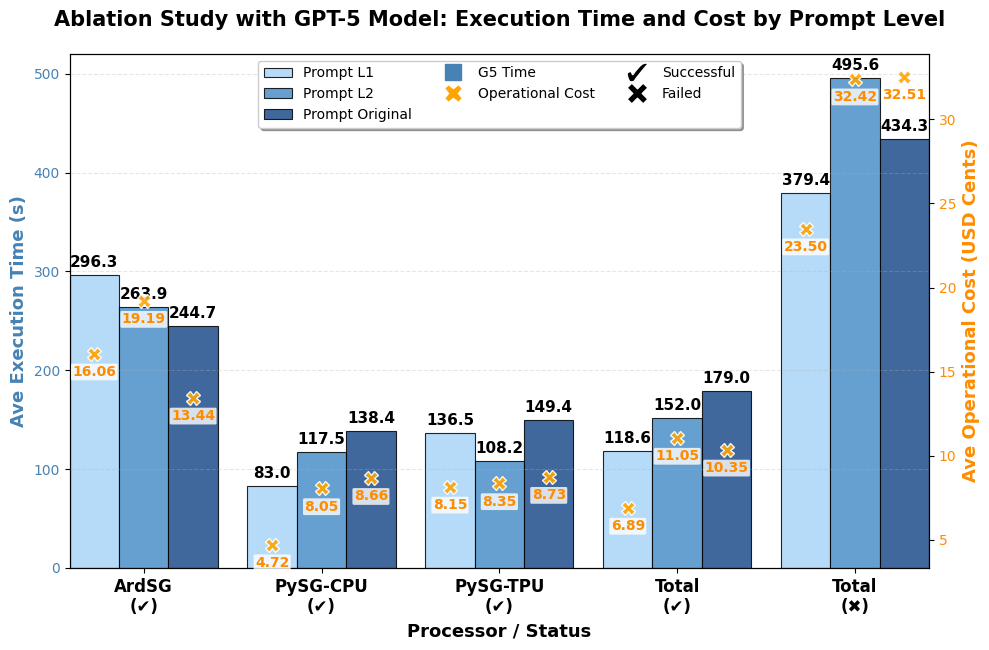


Plot saved as 'figs/gpt5_time_cost_by_prompt_type.png'


In [ ]:
# Add custom legend entries for time and cost indicators
from matplotlib.lines import Line2D
from termcolor import COLORS
# Create the bar chart with dual y-axes
# Define x-axis categories and positions
 
# Create categories with marks for display
categories_display = [f"{PROCESSOR_LABELS['sg']}\n(✔)", f"{PROCESSOR_LABELS['psg']}\n(✔)", 
                     f"{PROCESSOR_LABELS['tpusg']}\n(✔)", 'Total\n(✔)', 'Total\n(✖)']
# Keep original categories for data lookup
categories = [f"{PROCESSOR_LABELS['sg']}", PROCESSOR_LABELS['psg'], 
              PROCESSOR_LABELS['tpusg'], 'Total\n(✔)', 'Total\n(✖)']
x_positions = np.arange(len(categories))* 0.9

# Chart dimensions
num_categories = len(categories)
series_count = len(prompt_types)  # 3 prompt types
fig_width = max(10, num_categories * 0.75)
fig_height = 6.0 + 0.12 * num_categories
font_base = 11
marker_size = 8 + (fig_width - 5.0) * 0.4
bar_width = 0.25

fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

# Create second y-axis for cost
ax2 = ax1.twinx()

# Plot bars for each prompt type
for idx, prompt_type in enumerate(prompt_types):
    # Get data for this prompt type
    prompt_data = metrics_df[metrics_df['prompt_type'] == prompt_type]
    
    times = []
    costs = []
    for category in categories:
        cat_data = prompt_data[prompt_data['category'] == category]
        if len(cat_data) > 0:
            times.append(cat_data['avg_time'].values[0])
            costs.append(cat_data['avg_cost'].values[0])
        else:
            times.append(0)
            costs.append(0)
    
    # Calculate positions for this prompt type's bars
    positions = x_positions + (idx - 1) * bar_width
    
    # Plot time bars
    bars_time = ax1.bar(positions, times, bar_width, 
                       label=PROMPT_TYPE_LABELS[prompt_type], 
                        color=colors_prompt[prompt_type], alpha=0.85,
                        edgecolor='black', linewidth=0.8)
    
    # Plot cost markers on secondary axis
    ax2.plot(positions, costs, 'X', markersize=marker_size, 
             markerfacecolor='orange', markeredgecolor='white', 
             markeredgewidth=1, alpha=0.9, zorder=5)
    
    # Add value labels on time bars
    for bar, time_val, cost_val in zip(bars_time, times, costs):
        height = bar.get_height()
        # Time label
        ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{time_val:.1f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
        # Cost label (above the marker)
        ax2.text(bar.get_x() + bar.get_width()/2., cost_val-1.5,
                f'{cost_val:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold',
                color='darkorange', bbox=dict(boxstyle="round,pad=0.1", fc="white", ec="none", alpha=0.8),)

# Set labels and title
ax1.set_xlabel('Processor / Status', fontsize=font_base + 2, fontweight='bold')
ax1.set_ylabel('Ave Execution Time (s)', fontsize=font_base + 2, fontweight='bold', color='steelblue')
ax2.set_ylabel('Ave Operational Cost (USD Cents)', fontsize=font_base + 2, fontweight='bold', color='darkorange')

ax1.set_title('Ablation Study with GPT-5 Model: Execution Time and Cost by Prompt Level', 
              fontsize=font_base + 4, fontweight='bold', pad=20)

# Set x-axis
ax1.set_xticks(x_positions)
ax1.set_xticklabels(categories_display, fontsize=font_base + 1, fontweight='bold')
ax1.set_xlim(x_positions[0] - bar_width*1.5, x_positions[-1] + bar_width*1.5)

# Set y-axis colors
ax1.tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Grid
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()

time_legend = Line2D([0], [0], color='steelblue', marker='s', linestyle='', 
                     markersize=marker_size+2, label='G5 Time', markerfacecolor='steelblue')
cost_legend = Line2D([0], [0], marker='X', color='w', markerfacecolor='orange', 
                     markersize=marker_size+3, markeredgecolor='white', label='Operational Cost')
success_legend=Line2D([0], [0], marker="$✔$", color="w", mfc="black", ms=marker_size + 5, label="Successful")
    
fail_legend=  Line2D([0], [0], marker="$✖$", color="w", mfc="black", ms=marker_size + 5, label="Failed")

all_handles = handles1 + [time_legend, cost_legend,success_legend, fail_legend]
all_labels = labels1 + ['G5 Time', 'Operational Cost', 'Successful', 'Failed']

ax1.legend(all_handles, all_labels, loc='upper center', fontsize=font_base - 1, 
           title_fontsize=font_base, frameon=True, fancybox=True, shadow=True,ncol=3)

plt.tight_layout()
plt.savefig('figs/gpt5_time_cost_by_prompt_type.pdf', dpi=300, bbox_inches='tight')
plt.show()

# print("\nPlot saved as 'figs/gpt5_time_cost_by_prompt_type.pdf'")
print("\nPlot saved as 'figs/gpt5_time_cost_by_prompt_type.png'")


## Export Statistics to CSV

Export the statistics used for all plots for reproducibility, including the prompt_type dimension.

In [19]:
# ═══════════════════════════════════════════════════════════════════════════
# Export 1: Success Rate Statistics (for Plots 1 & 2)
# ═══════════════════════════════════════════════════════════════════════════

# Calculate success/failure counts for each combination
def calculate_counts(group):
    total = len(group)
    success_count = (group['status'] == 'success').sum()
    failure_count = total - success_count
    success_rate = (success_count / total) if total > 0 else 0
    return pd.Series({
        'success_count': success_count,
        'failure_count': failure_count,
        'total': total,
        'success_rate': success_rate
    })

success_rate_details = df.groupby(['model', 'prompt_type', 'processor']).apply(
    calculate_counts, include_groups=False
).reset_index()

# Add display labels
success_rate_details['model_label'] = success_rate_details['model'].map(MODEL_LABELS)
success_rate_details['processor_label'] = success_rate_details['processor'].map(PROCESSOR_LABELS)
success_rate_details['prompt_type_label'] = success_rate_details['prompt_type'].map(PROMPT_TYPE_LABELS)

# Reorder columns for clarity
export_cols = ['model', 'model_label', 'processor', 'processor_label', 
               'prompt_type', 'prompt_type_label', 
               'success_count', 'failure_count', 'total', 'success_rate']
success_rate_export_df = success_rate_details[export_cols]

# Sort by model, prompt_type, and processor order
success_rate_export_df['model_order'] = success_rate_export_df['model'].map(
    {m: i for i, m in enumerate(MODEL_ORDER_PREF)})
success_rate_export_df['prompt_order'] = success_rate_export_df['prompt_type'].map(
    {p: i for i, p in enumerate(TYPE_ORDER_PREF)})
success_rate_export_df['processor_order'] = success_rate_export_df['processor'].map(
    {p: i for i, p in enumerate(PROCESSOR_ORDER_PREF)})

success_rate_export_df = success_rate_export_df.sort_values(
    ['model_order', 'prompt_order', 'processor_order']
).drop(['model_order', 'prompt_order', 'processor_order'], axis=1)

export_file_1 = 'success_rate_statistics_ablation.csv'
success_rate_export_df.to_csv(export_file_1, index=False)
print(f"\n✔ Exported success rate statistics to: {export_file_1}")
print(f"  Rows: {len(success_rate_export_df)}, Columns: {list(success_rate_export_df.columns)}")

# ═══════════════════════════════════════════════════════════════════════════
# Export 2: Cost/Time Statistics (for Plot 3 - GPT-5 Analysis)
# ═══════════════════════════════════════════════════════════════════════════

# Use the metrics_df created earlier for GPT-5
# Add model and model_label columns
metrics_df['model'] = 'gpt-5'
metrics_df['model_label'] = 'G5'

# Rename category_label to match the other exports
cost_time_export_df = metrics_df[['model', 'model_label', 'category', 'prompt_type', 
                                   'avg_time', 'avg_cost', 'status_filter']].copy()

# Add prompt_type_label
cost_time_export_df['prompt_type_label'] = cost_time_export_df['prompt_type'].map(PROMPT_TYPE_LABELS)

# Add category_label column (with status icons)
def create_category_label(row):
    if row['category'] == 'Total\n(✔)':
        return 'Total✔'
    elif row['category'] == 'Total\n(✖)':
        return 'Total✖'
    else:
        # For processor categories, add (✔) mark
        return f"{row['category']}✔"

cost_time_export_df['category_label'] = cost_time_export_df.apply(create_category_label, axis=1)

# Rename columns to match other exports
cost_time_export_df = cost_time_export_df.rename(columns={
    'avg_time': 'latency',
    'avg_cost': 'cost_cents',
    'status_filter': 'status'
})

# Reorder columns
export_cols_2 = ['model', 'model_label', 'category', 'category_label', 
                 'prompt_type', 'prompt_type_label', 'status', 'latency', 'cost_cents']
cost_time_export_df = cost_time_export_df[export_cols_2]

# For every row in cost_time_export_df, if the value is 'Total\n(✔)', change to Total-Success, if the value is 'Total\n(✖)', change to Total-Failure
cost_time_export_df['category'] = cost_time_export_df['category'].replace({
    'Total\n(✔)': 'Total-Success',
    'Total\n(✖)': 'Total-Failure'
})
export_file_2 = 'gpt_consumption_statistics_ablation.csv'
cost_time_export_df.to_csv(export_file_2, index=False)
print(f"\n✔ Exported cost/time statistics to: {export_file_2}")
print(f"  Rows: {len(cost_time_export_df)}, Columns: {list(cost_time_export_df.columns)}")

print("\n" + "="*80)
print("EXPORT COMPLETE")
print("="*80)
print(f"Files saved in current directory:")
print(f"  1. {export_file_1} - Success rates by model, prompt_type, and processor")
print(f"  2. {export_file_2} - Average time and cost statistics by prompt_type")
print("="*80)


✔ Exported success rate statistics to: success_rate_statistics_ablation.csv
  Rows: 25, Columns: ['model', 'model_label', 'processor', 'processor_label', 'prompt_type', 'prompt_type_label', 'success_count', 'failure_count', 'total', 'success_rate']

✔ Exported cost/time statistics to: gpt_consumption_statistics_ablation.csv
  Rows: 15, Columns: ['model', 'model_label', 'category', 'category_label', 'prompt_type', 'prompt_type_label', 'status', 'latency', 'cost_cents']

EXPORT COMPLETE
Files saved in current directory:
  1. success_rate_statistics_ablation.csv - Success rates by model, prompt_type, and processor
  2. gpt_consumption_statistics_ablation.csv - Average time and cost statistics by prompt_type


/tmp/ipykernel_2863060/2894877855.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_rate_export_df['model_order'] = success_rate_export_df['model'].map(
/tmp/ipykernel_2863060/2894877855.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_rate_export_df['prompt_order'] = success_rate_export_df['prompt_type'].map(
/tmp/ipykernel_2863060/2894877855.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [20]:
# Verify the exported files
print("="*80)
print("VERIFICATION: Success Rate Statistics")
print("="*80)
print(success_rate_export_df.to_string(index=False))

print("\n" + "="*80)
print("VERIFICATION: Cost/Time Statistics")
print("="*80)
print(cost_time_export_df.to_string(index=False))

VERIFICATION: Success Rate Statistics
 model model_label processor processor_label prompt_type prompt_type_label  success_count  failure_count  total  success_rate
 gpt-5          G5        sg           ArdSG     abla-l1         Prompt L1            3.0           27.0   30.0      0.100000
 gpt-5          G5       psg        PySG-CPU     abla-l1         Prompt L1           30.0            0.0   30.0      1.000000
 gpt-5          G5     tpusg        PySG-TPU     abla-l1         Prompt L1           30.0            0.0   30.0      1.000000
 gpt-5          G5        sg           ArdSG     abla-l2         Prompt L2           21.0            9.0   30.0      0.700000
 gpt-5          G5       psg        PySG-CPU     abla-l2         Prompt L2           30.0            0.0   30.0      1.000000
 gpt-5          G5     tpusg        PySG-TPU     abla-l2         Prompt L2           30.0            0.0   30.0      1.000000
 gpt-5          G5        sg           ArdSG    original   Prompt Original      

### How to Use the Exported Statistics

The two CSV files contain all the data needed to reproduce the plots:

#### File 1: `success_rate_statistics_ablation.csv`
**Purpose:** Reproduce the success rate bar charts (Plots 1 & 2)

**Columns:**
- `model`: Internal model name (e.g., 'gpt-5', 'phi4', 'qwen32')
- `model_label`: Display label for plotting (e.g., 'G5', 'Phi4', 'Qw32B')
- `processor`: Processor stage (e.g., 'sg', 'psg', 'tpusg')
- `processor_label`: Display label for plotting (e.g., 'ArdSG', 'PySG-CPU', 'PySG-TPU')
- `prompt_type`: Prompt type identifier ('abla-l1', 'abla-l2', 'original')
- `prompt_type_label`: Display label for plotting (e.g., 'Prompt L1', 'Prompt L2', 'Prompt Original')
- `success_count`: Number of successful runs
- `failure_count`: Number of failed runs
- `total`: Total number of runs
- `success_rate`: Success rate as decimal (0-1)

**Usage:** Filter by processor and/or model, group by prompt_type, then visualize as grouped bar chart.

#### File 2: `gpt_consumption_statistics_ablation.csv`
**Purpose:** Reproduce the GPT-5 cost/time analysis chart (Plot 3)

**Columns:**
- `model`: Internal model name ('gpt-5')
- `model_label`: Display label ('G5')
- `category`: Category identifier (processor names or 'Total\n(✔)', 'Total\n(✖)')
- `category_label`: Display label with status icons (e.g., 'ArdSG (✔)', 'Total (✖)')
- `prompt_type`: Prompt type identifier ('abla-l1', 'abla-l2', 'original')
- `prompt_type_label`: Display label (e.g., 'Prompt L1', 'Prompt L2', 'Prompt Original')
- `status`: Either 'success' or 'failure'
- `latency`: Average execution time in seconds
- `cost_cents`: Average operational cost in USD cents (already scaled by 100)

**Usage:** Group by prompt_type and category, create grouped bar chart for latency, overlay scatter plot for cost.

**Note:** Cost values are in cents (scaled by 100 from USD) as shown in the plots.